In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools


In [2]:
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")


In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
df.columns


Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [70]:
df["class"].value_counts()

2    4998
1    4152
3     850
Name: class, dtype: int64

In [8]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [9]:
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [10]:
df.drop(["objid", "rerun"], axis = 1, inplace = True)

In [11]:
df.nunique()

ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [48]:
num = {'STAR':1,'GALAXY':2,'QSO':3}
df.replace({'class':num},inplace=True)


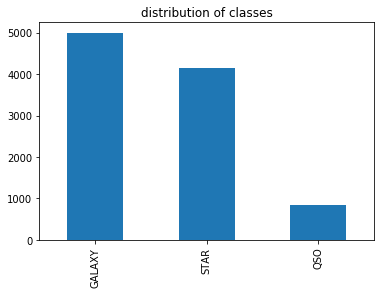

In [13]:
df['class'].value_counts().plot(kind='bar')
plt.title("distribution of classes")
plt.show()

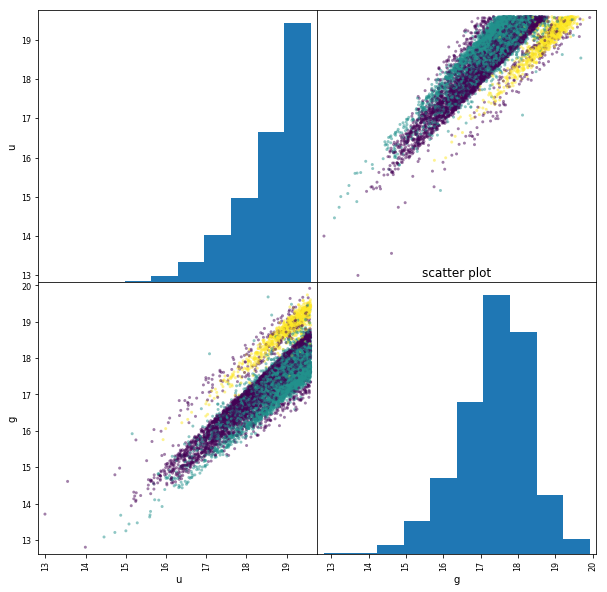

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['u','g']],c=df['class'],figsize=(10, 10))
plt.title("scatter plot")
plt.show()

In [78]:
x=df.drop('class',axis=1)
y=df['class']

In [16]:
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,4,269,3.649550e+17,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,4,269,3.232870e+17,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,4,269,3.722370e+18,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,4,270,3.638290e+17,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,4,270,3.243690e+17,0.040508,288,52000,400


In [17]:
y

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
5         STAR
6       GALAXY
7         STAR
8         STAR
9       GALAXY
10        STAR
11        STAR
12        STAR
13        STAR
14      GALAXY
15         QSO
16        STAR
17         QSO
18        STAR
19      GALAXY
20        STAR
21        STAR
22         QSO
23        STAR
24        STAR
25      GALAXY
26      GALAXY
27        STAR
28        STAR
29        STAR
         ...  
9970    GALAXY
9971    GALAXY
9972      STAR
9973      STAR
9974    GALAXY
9975    GALAXY
9976    GALAXY
9977    GALAXY
9978    GALAXY
9979       QSO
9980    GALAXY
9981    GALAXY
9982      STAR
9983      STAR
9984    GALAXY
9985    GALAXY
9986    GALAXY
9987    GALAXY
9988    GALAXY
9989    GALAXY
9990    GALAXY
9991    GALAXY
9992      STAR
9993    GALAXY
9994      STAR
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: class, Length: 10000, dtype: object

In [79]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [80]:
x_train.shape

(7000, 15)

In [81]:
y_test.value_counts()

2    1497
1    1217
3     286
Name: class, dtype: int64

In [20]:
y_train.shape

(7000,)

ImportError: cannot import name 'zero_one_score'

In [67]:
from sklearn.svm import SVC
svm = SVC(random_state = 42, gamma=0.0001,kernel='rbf')
svm.fit(x_train, y_train)
svmScore = svm.score(x_test, y_test)
print("test Accuracy of Support Vector Machine is : ", svmScore)
svmScore = svm.score(x_train, y_train)
print("train Accuracy of Support Vector Machine is : ", svmScore)



test Accuracy of Support Vector Machine is :  0.7063333333333334
train Accuracy of Support Vector Machine is :  0.9492857142857143


In [22]:
scores = cross_val_score(svm, x, y, cv=10, scoring = "accuracy")
res=scores.mean()
res

0.6398001613001613

In [68]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_pred)
cm

array([[1406,   30,   61],
       [ 262,    9,   15],
       [ 497,   16,  704]], dtype=int64)

In [69]:
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.64942263 0.16363636 0.9025641 ]
recall: [0.93921176 0.03146853 0.57847165]
fscore: [0.7678864  0.05278592 0.70505759]
support: [1497  286 1217]


In [86]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42,max_depth=10,criterion='gini')
dt_model.fit(x_train,y_train)
DTScore = dt_model.score(x_test, y_test)

print("test Accuracy of Decision Tree  is : ", 1-DTScore)
DTScore = dt_model.score(x_train, y_train)

print("train Accuracy of Decision Tree  is : ", DTScore)


test Accuracy of Decision Tree  is :  0.012333333333333307
train Accuracy of Decision Tree  is :  0.9972857142857143


In [170]:
scores = cross_val_score(dt_model, x, y, cv=10, scoring = "accuracy")
res=scores.mean()
res

0.9866990952990953

In [60]:
y_pred = dt_model.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_pred)
cm

array([[1487,    7,    3],
       [  19,  267,    0],
       [   6,    2, 1209]], dtype=int64)

In [61]:
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.98346561 0.9673913  0.99752475]
recall: [0.99331997 0.93356643 0.99342646]
fscore: [0.98836823 0.95017794 0.99547139]
support: [1497  286 1217]


In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, random_state = 42,max_depth=10,criterion='gini')
rf.fit(x_train, y_train)
randomForestScore = rf.score(x_test, y_test)
print("test Accuracy of Random Forest Classifier is : ",1- randomForestScore)
randomForestScore = rf.score(x_train, y_train)
print("train Accuracy of Random Forest Classifier is : ", randomForestScore)


test Accuracy of Random Forest Classifier is :  0.010000000000000009
train Accuracy of Random Forest Classifier is :  0.9957142857142857


In [45]:
scores = cross_val_score(rf, x, y, cv=10, scoring = "accuracy")
res=scores.mean()
res

0.9872995945995948

In [63]:
y_pred = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_pred)
cm

array([[1484,    3,   10],
       [  15,  271,    0],
       [   2,    0, 1215]], dtype=int64)

In [64]:
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.98867422 0.98905109 0.99183673]
recall: [0.99131597 0.94755245 0.99835661]
fscore: [0.98999333 0.96785714 0.995086  ]
support: [1497  286 1217]
